# Impact of "Échele Cabeza" on the use of psychoactive substances.

# MODELS. 

<br>
<br>
<center>
    <img src="https://www.iartificial.net/wp-content/uploads/2019/02/IA.jpg" width="450" alt="ds.img"  />
</center>
<br>
<br>
<div style="text-align: left"> <b>By Team 218 DS4A 2022 :</b> </div><img src="https://www.echelecabeza.com/wp-content/uploads/2020/07/logoweb.png" width="250" alt="echelecabeza.img" style="float: right; margin-right: 10px;"/><img src="https://github.com/davidcla07/ds4a-Team-218/blob/My-Projects/Logo%201.png?raw=true" width="200" alt="echelecabeza.img" style="float: right; margin-right: 120px;"/>
<br>
<div style="text-align: left"> <b>Irina Romo Aguas</b></div>
<div style="text-align: left"> <b>Paula Camargo Scoppetta</b> </div>
<div style="text-align: left"> <b>Juan Diego Calvo Hoyos</b> </div> 
<div style="text-align: left"> <b>Jhonny Castro Clavijo</b> </div> 
<div style="text-align: left"> <b>Luis Eduardo Garzón Castañeda</b> </div> 
<div style="text-align: left"> <b>Cristhian Camilo Gómez Mayor</b> </div> 
<div style="text-align: left"> <b>David Clavijo Suarez</b> </div> 
<br>


# About this Notebook

In this notebook you will find all the steps that we made to create the model for the project called "Impact of Échele Cabeza on the use of psychoactive substances."

First we imported the necessary libraries:

In [63]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sfm

from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve,confusion_matrix, auc
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from statsmodels.formula.api import ols
import plotly.express as px

from IPython.display import display_html
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

import joblib


The dataset that was used to create the model is:

In [2]:
df_ech_cab = pd.read_csv("Data/df_ech_cab.csv") #Let´s call the clean dataset.
df_ech_cab.head() # Now, we visualize the first 5 rows.

,Año,Ciudad Evento,Evento,Fecha Evento,Sustancia Declarada,Codigo Sustancia,Referencia,Color,Precio,Cantidad,...,Residencia Municipio,Sexo,Identidad de genero,Recibió Resultados,Resultado,Scott precipitado,Levamisol,Anestesicos locales,Grado de Pureza,Observaciones
0,2013,Bogotá,Bogotrax,2013-01-02,Cocaína,C,NaN,Blanco,NaN,NaN,...,NaN,M,NaN,Si,Positivo,NaN,NaN,NaN,Clorhidrato cocaína (50 - 75%),NaN
1,2013,Bogotá,Bogotrax,2013-01-02,Cocaína,C,NaN,Blanco,NaN,NaN,...,NaN,M,NaN,Si,Positivo,NaN,NaN,NaN,Clorhidrato cocaína (50 - 75%),NaN
2,2013,Bogotá,Bogotrax,2013-01-02,2CB,F,NaN,NaN,NaN,NaN,...,NaN,M,NaN,Si,Negativo,NaN,NaN,NaN,NaN,Posible anfetamina
3,2013,Bogotá,Bogotrax,2013-01-02,Cocaína,C,NaN,Blanco,NaN,NaN,...,NaN,M,NaN,Si,Positivo,NaN,NaN,NaN,Clorhidrato cocaína (75% - >),NaN
4,2013,Bogotá,Bogotrax,2013-01-02,MDMA,E,NaN,NaN,NaN,NaN,...,NaN,M,NaN,Si,Negativo,NaN,NaN,NaN,NaN,NaN


It's important to take a look at the data before the modelling.
First we reviewed the main statistics measures of the numerical features:

In [3]:
df_ech_cab.describe() #visualize the summary statistics

,Año,Precio,Cantidad,Precio promedio,Para cuantas personas es la muestra,Edad
count,13901.000000,1.253800e+04,12773.000000,1.251900e+04,13872.000000,10324.000000
mean,2019.019711,5.314490e+04,1.406059,4.609634e+04,2.332757,26.162243
std,2.320794,2.314146e+05,9.440717,4.465006e+04,2.657130,5.502364
min,2013.000000,0.000000e+00,0.100000,0.000000e+00,0.000000,17.000000
25%,2017.000000,2.500000e+04,1.000000,2.500000e+04,1.000000,22.000000
50%,2019.000000,3.500000e+04,1.000000,3.000000e+04,1.000000,25.000000
75%,2021.000000,6.000000e+04,1.000000,6.000000e+04,3.000000,29.000000
max,2022.000000,2.500000e+07,1000.000000,1.500000e+06,100.000000,62.000000


We found that the distribution of the variables is skewed and It includes some extreme values that may affect our model. 

In [4]:
df_ech_cab_2= df_ech_cab.copy() #create a copy in case we do something wrong. 

According to the context and the EDA, we will consider only some of the variables:

In [5]:
var_interes =["Año", "Ciudad Evento", "Evento", "Sustancia Declarada", "Codigo Sustancia",
             "Referencia", "Color", "Precio", "Cantidad", "Precio promedio", "Primera vez Sustancia", 
              "Frecuencia", "Modalidad Adquisicion", "Para cuantas personas es la muestra", "Consumio parte de la muestra",
              "Efectos negativos", "Adquisicion Barrio", "Ciudad Adquisicion","Desplazamiento", "Edad", "Residencia Comuna",
             "Sexo", "Resultado", "Recibió Resultados"] #variables of interest

In [6]:
df_ech_cab_2 =df_ech_cab_2[var_interes] 
df_ech_cab_2.info() # visualize the type of variables the dataset has

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13901 entries, 0 to 13900
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Año                                  13901 non-null  int64  
 1   Ciudad Evento                        13897 non-null  object 
 2   Evento                               13901 non-null  object 
 3   Sustancia Declarada                  13898 non-null  object 
 4   Codigo Sustancia                     13901 non-null  object 
 5   Referencia                           9485 non-null   object 
 6   Color                                9913 non-null   object 
 7   Precio                               12538 non-null  float64
 8   Cantidad                             12773 non-null  float64
 9   Precio promedio                      12519 non-null  float64
 10  Primera vez Sustancia                13874 non-null  object 
 11  Frecuencia                  

The next step was to convert the categorical variables to category and the result to binary:

In [7]:
# The positive result of the analysis is 1 and the negative result is 0.
df_ech_cab_2=df_ech_cab_2.replace({"Resultado":{'Positivo':"1", 'Negativo':"0", 'No realizado':np.nan, "nan": np.nan, 'Coctel':"0"}})
df_ech_cab_2=df_ech_cab_2.astype({"Ciudad Evento":"category", "Evento":"category", "Sustancia Declarada":"category", 
                      "Codigo Sustancia":"category", "Referencia":"category", "Color":"category", 
                      "Primera vez Sustancia":"category", "Frecuencia":"category", "Modalidad Adquisicion":"category",
                      "Consumio parte de la muestra":"category", "Efectos negativos":"category", 
                      "Adquisicion Barrio":"category", "Ciudad Adquisicion":"category","Desplazamiento":"category",
                      "Residencia Comuna":"category", "Sexo":"category", "Resultado":"category", 
                      "Recibió Resultados":"category"})


In [8]:
df_ech_cab_2["Precio"].mean()

53144.90445047057

In [9]:
df_ech_cab_2["Precio"].std()

231414.62040426026

Price and average price needed to be normalized because of the very extreme values and the high deviation:

In [10]:
df_ech_cab_2["Precio"] =(df_ech_cab_2["Precio"]-df_ech_cab_2["Precio"].mean())/df_ech_cab_2["Precio"].std()
df_ech_cab_2["Precio promedio"] =(df_ech_cab_2["Precio promedio"]-df_ech_cab_2["Precio promedio"].mean())/df_ech_cab_2["Precio promedio"].std()

Then, It was important to examine correlation between variables to avoid multicollinearity:

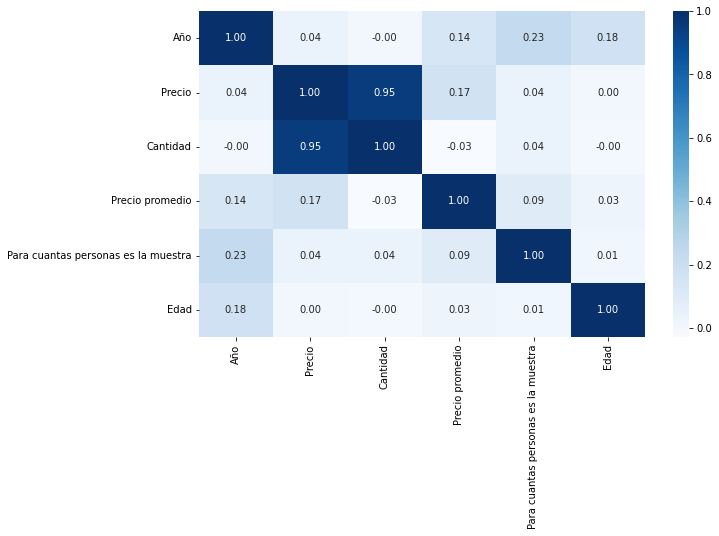

In [11]:
fig, ax = plt.subplots(figsize=(10,6)) # set the space to the figure
corr = df_ech_cab_2.corr() # Create the correlation matrix of the data
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, cmap="Blues", annot=True, fmt=".2f"); 
#create a heatmap to show the correlations

There is a fairly strong correlation (0.95) between quantity and price, so one of them should not be included in the model. 

Although we found some important information in the EDA, the relation between the variables was reviewed with some important plots:

For the numeric features boxplots was the best option:

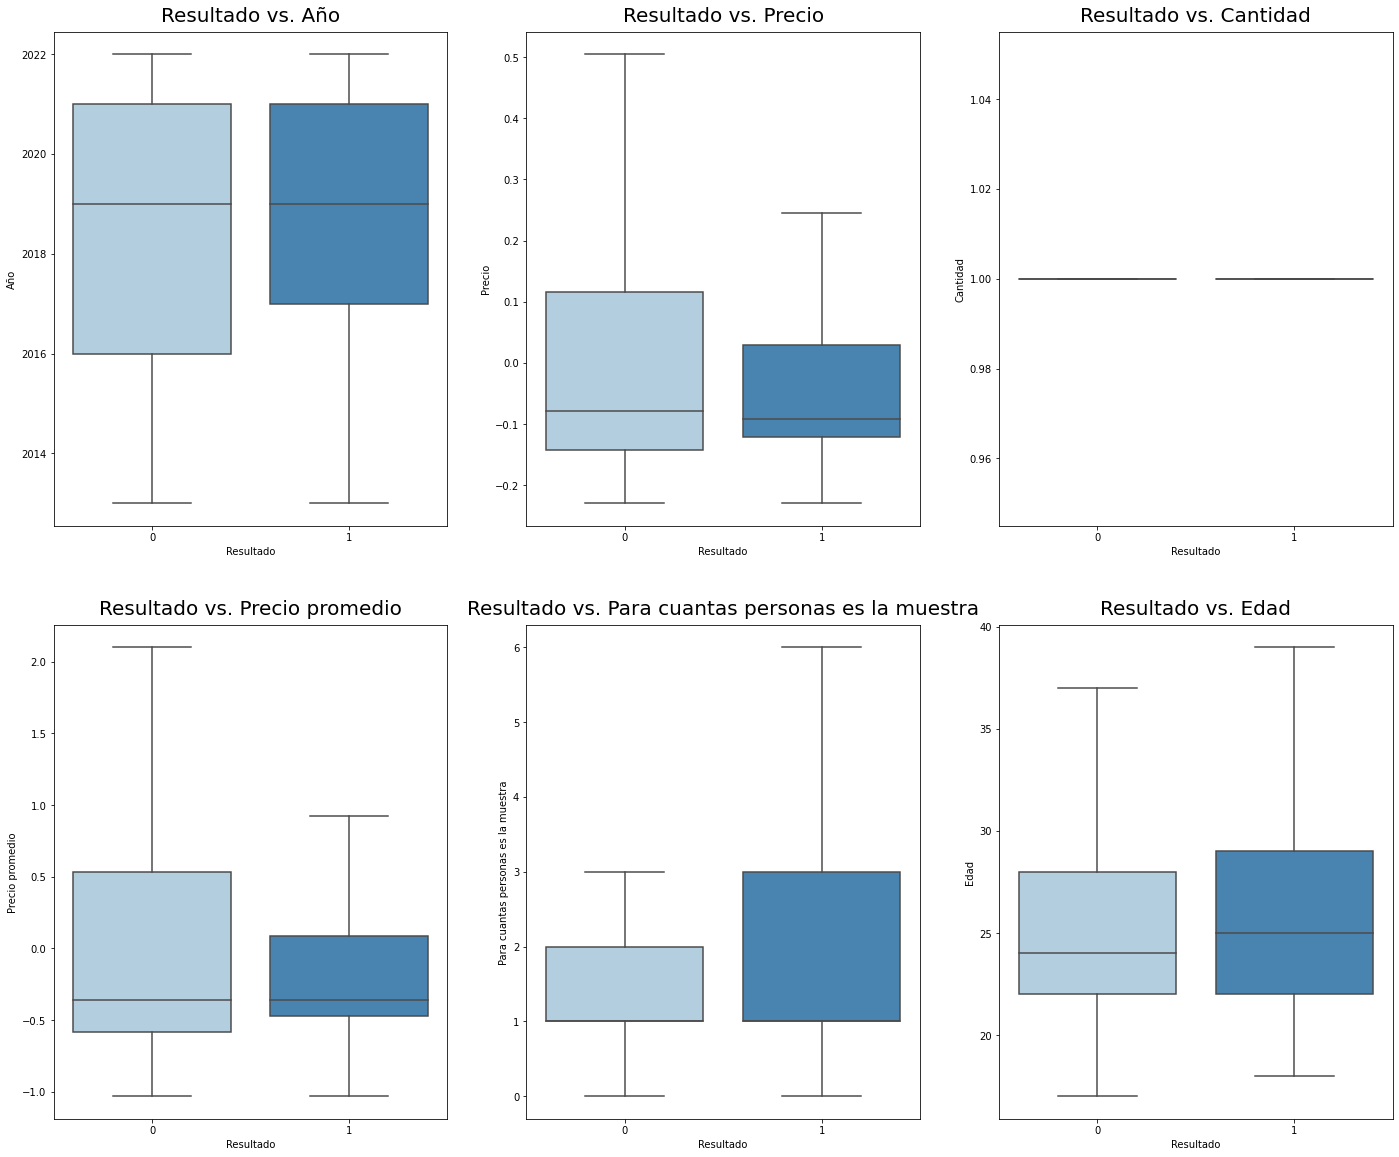

In [12]:
# Numeric features
plt.figure(figsize=(24,20))
var_num = ["Año","Precio", "Cantidad", "Precio promedio","Para cuantas personas es la muestra", "Edad"] #this are the variables
for i,feature in enumerate(var_num):
    plt.subplot(2,3,i+1)
    sns.boxplot(y= feature, x='Resultado', data=df_ech_cab_2, palette="Blues", showfliers = False)
    plt.xlabel('Resultado')
    plt.ylabel(feature)
    plt.title("Resultado vs. " + feature, fontsize=20, verticalalignment='bottom');

From the above graphs, it can be seen that at first glance there appear to be differences between the distributions of the variables if they are separated according to the result of the analysis, except for the quantity.
For the categorical features heatmaps were more appropriate:

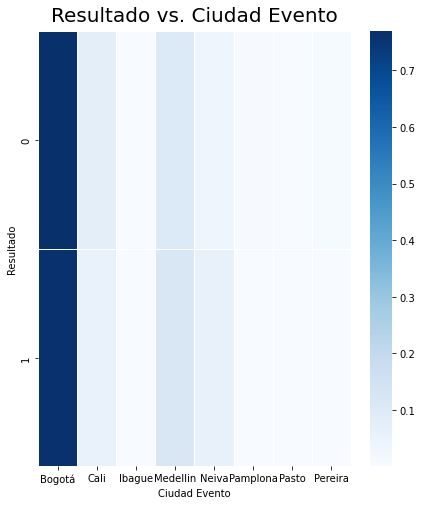

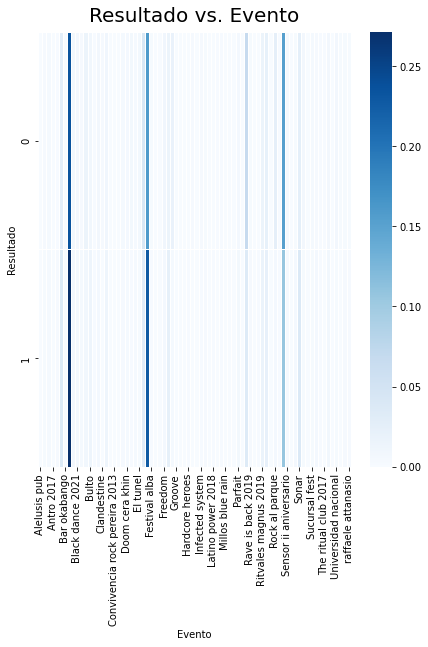

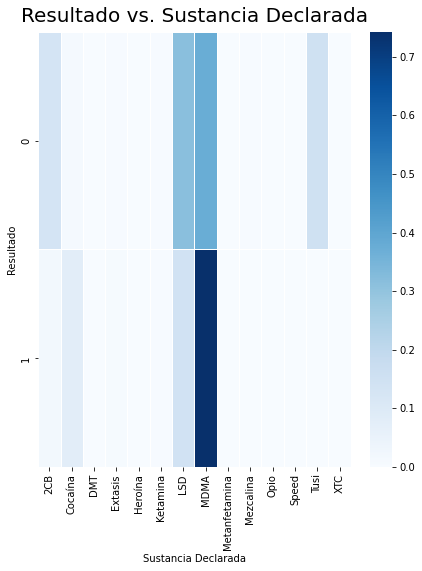

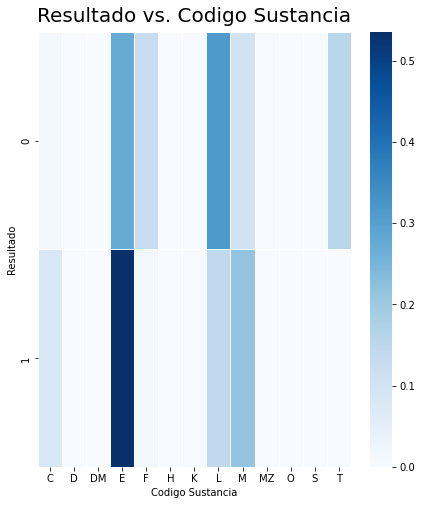

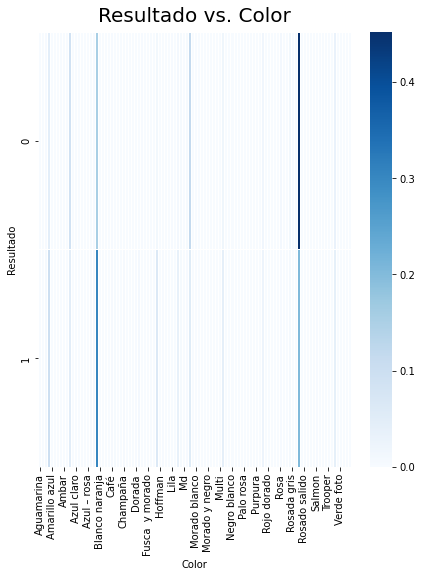

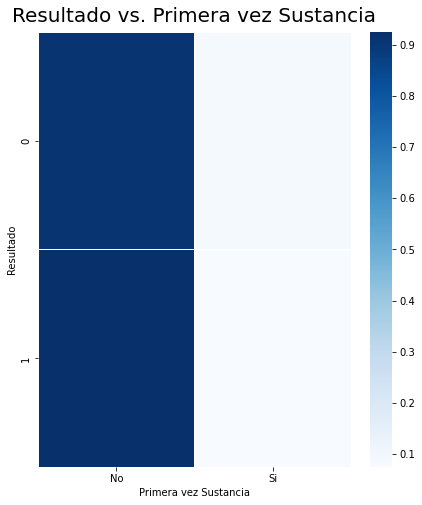

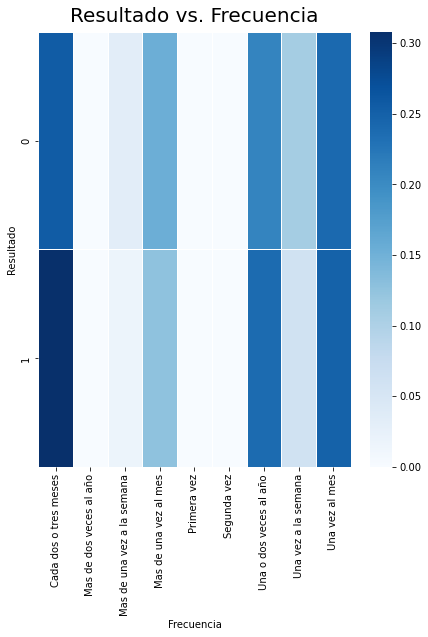

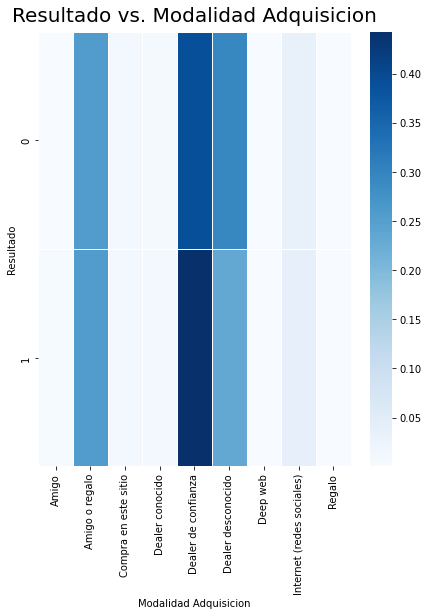

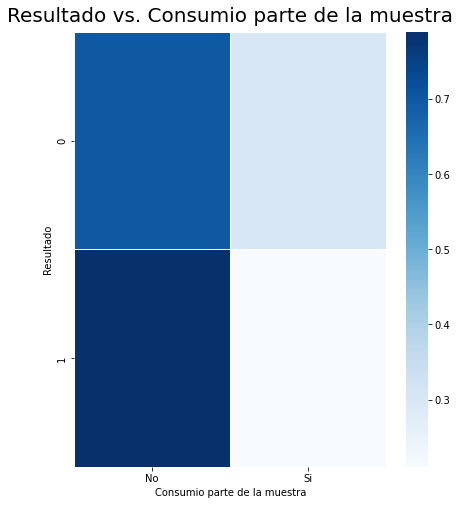

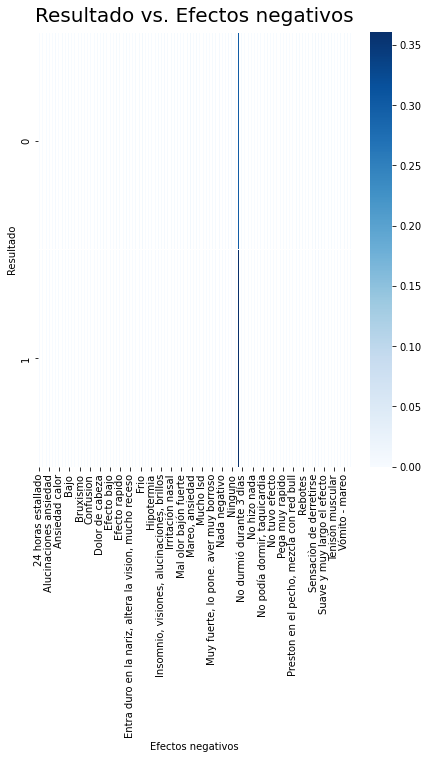

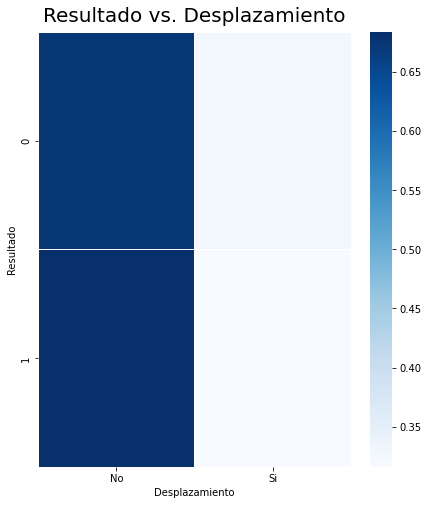

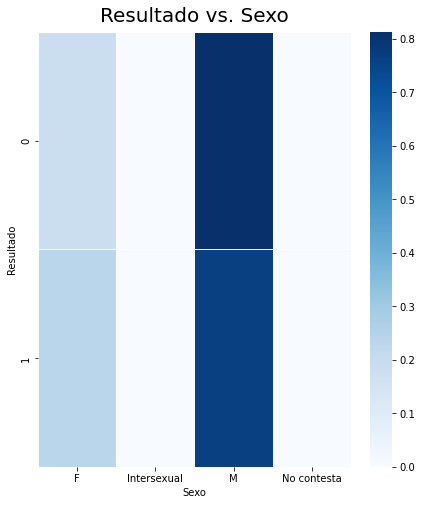

In [13]:
# Categorical features

var_num = ["Ciudad Evento", "Evento", "Sustancia Declarada","Codigo Sustancia", "Color", 
            "Primera vez Sustancia", "Frecuencia", "Modalidad Adquisicion","Consumio parte de la muestra", 
            "Efectos negativos","Desplazamiento", "Sexo"] #this are the variables
for i,feature in enumerate(var_num):
    
    colvalues = df_ech_cab_2[feature]
    my_contingency_table = pd.crosstab(index=df_ech_cab_2["Resultado"], 
                                   columns = colvalues, normalize ="index")
    plt.figure(figsize=(7,8))
    sns.heatmap(my_contingency_table, cmap="Blues", linewidths=.5);
    plt.xlabel(feature)
    plt.ylabel('Resultado')
    plt.title("Resultado vs. " + feature, fontsize=20, verticalalignment='bottom');

Visually, the only plots where differences were seen between the distributions of the analysis results are in declared substance, substance code and color. In the other plots, a more homogeneous distribution was observed.

The next step was to check for differences between the groups for the numerical variables using a t-test for differences between means:

In [14]:
var_num = ["Año","Precio", "Cantidad", "Precio promedio","Para cuantas personas es la muestra", "Edad"] #this are the variables
for i,feature in enumerate(var_num):
    a=df_ech_cab_2[df_ech_cab_2['Resultado']=="0"][feature].dropna()
    b=df_ech_cab_2[df_ech_cab_2['Resultado']=="1"][feature].dropna()
    T,p=ttest_ind(a,b)
    print(feature,p,T) 

Año 5.409282678330341e-24 -10.121150202959647
Precio 0.2393367694945933 1.1767032073644406
Cantidad 0.16536309711877423 1.3873389837866732
Precio promedio 0.0031936981344440215 2.9490341127690956
Para cuantas personas es la muestra 0.0013446669249519714 -3.206935917477278
Edad 3.9086738282603186e-07 -5.0767186297979485


It was found that for the variables quantity (p-value=0.1654) and price (p-value=0.2393) there are no statistically significant differences, so both variables were excluded from the model.


### Find out the best features

One method very useful to find out which is the best features is the Mutual Information method. 

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory, there's no upper bound to what MI can be. In practice, though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly) (see https://www.kaggle.com/ryanholbrook/mutual-information). 

In the following code, we used this method:

In [15]:
def make_mi_scores(x, y):
    mi_scores = mutual_info_classif(x, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

To apply the function above we had to transform the categorical variable. The function that we use for all the categorical variables is:

In [16]:
#function that return df with categorical variables encoding

def transform_categorical(df):
    df.reset_index(drop=True, inplace=True)
    categorical_columns = df.select_dtypes(include=["object","category"]).columns.tolist()
       
    ordinal_encoding_variables = [i for i in categorical_columns if df[i].nunique()>2]
    one_hot_encoding_variables = [i for i in categorical_columns if df[i].nunique()<3]
    
    ordinal_encoder = OrdinalEncoder()
    
    df_ordinal_encoding = pd.DataFrame(ordinal_encoder.fit_transform(df[ordinal_encoding_variables])) #create ordinal features
    df_ordinal_encoding.columns = ordinal_encoding_variables #change columns names, ordinal encoder remove the names
    df_coding = pd.get_dummies(df, columns=one_hot_encoding_variables, drop_first=True).copy()
    df_coding.drop(columns=ordinal_encoding_variables, inplace=True)
    categories= ordinal_encoder.categories_
    return pd.concat([df_coding, df_ordinal_encoding], axis=1), categories, df_ordinal_encoding

With the full echele cabeza dataset:

In [17]:
a=df_ech_cab_2.dropna() #Drop the null vallues, which was not the best option but is a beginning point

In [18]:
X= a.drop(["Resultado"],axis=1)
y= a["Resultado"]
X,_,_ =transform_categorical(X)

In [19]:
X

,Año,Precio,Cantidad,Precio promedio,Para cuantas personas es la muestra,Edad,Primera vez Sustancia_Si,Consumio parte de la muestra_Si,Desplazamiento_Si,Sexo_Intersexual,...,Sustancia Declarada,Codigo Sustancia,Referencia,Color,Frecuencia,Modalidad Adquisicion,Efectos negativos,Adquisicion Barrio,Ciudad Adquisicion,Residencia Comuna
0,2021,-0.100015,1.0,-0.360500,4.0,23.0,0,1,0,0,...,4.0,1.0,34.0,9.0,5.0,0.0,4.0,67.0,1.0,33.0
1,2021,-0.100015,1.0,-0.360500,6.0,23.0,0,1,0,0,...,4.0,1.0,7.0,9.0,2.0,3.0,24.0,21.0,1.0,7.0
2,2021,-0.100015,1.0,-0.360500,2.0,22.0,0,1,0,0,...,4.0,1.0,46.0,2.0,0.0,0.0,34.0,94.0,1.0,32.0
3,2021,-0.013590,1.0,0.087428,2.0,26.0,0,1,1,0,...,4.0,1.0,43.0,2.0,5.0,0.0,36.0,21.0,1.0,5.0
4,2021,-0.107361,1.0,-0.398574,1.0,22.0,0,1,0,0,...,4.0,1.0,38.0,9.0,3.0,2.0,24.0,94.0,1.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021,-0.100015,1.0,-0.360500,2.0,37.0,0,1,1,0,...,4.0,1.0,12.0,9.0,5.0,2.0,10.0,0.0,8.0,21.0
213,2021,0.159260,1.0,0.983283,2.0,33.0,0,1,0,0,...,5.0,6.0,50.0,9.0,5.0,0.0,5.0,48.0,3.0,4.0
214,2021,0.029623,1.0,0.311392,2.0,22.0,0,1,1,0,...,4.0,5.0,29.0,3.0,2.0,3.0,24.0,69.0,3.0,26.0
215,2021,-0.056802,1.0,-0.136536,1.0,47.0,0,1,1,0,...,4.0,1.0,16.0,0.0,3.0,0.0,24.0,84.0,3.0,4.0


In [20]:
make_mi_scores(X, y)

Sustancia Declarada                    0.299352
Codigo Sustancia                       0.286509
Referencia                             0.239694
Precio promedio                        0.141909
Color                                  0.084880
Precio                                 0.081673
Frecuencia                             0.069216
Residencia Comuna                      0.043431
Ciudad Evento                          0.028545
Cantidad                               0.026392
Año                                    0.024772
Efectos negativos                      0.016020
Ciudad Adquisicion                     0.012962
Edad                                   0.011653
Sexo_Intersexual                       0.011200
Modalidad Adquisicion                  0.004878
Sexo_No contesta                       0.000000
Sexo_M                                 0.000000
Evento                                 0.000000
Desplazamiento_Si                      0.000000
Consumio parte de la muestra_Si        0

According to the MI scores, the variables that best explain the results of the analysis of th NPS are the type of substance, the average price, the color, the mode of acquisition, whether it is the first time they consume the substance, and so on. We did take this into account when creating the models.

Using Feature selector (RFE) from sklearn:

In [21]:
estimator = SVR(kernel="linear") # the method SVR use a method of classification called support vector machine SVM
selector = RFE(estimator, n_features_to_select=6, step=1) #change the n_features to the number of features of the model and see the classification
selector = selector.fit(X,y)


In [22]:
#print the ranking using RFE
feature_columns = X.columns.values
ranking_rfe = selector.ranking_.tolist()
for i,j in zip(feature_columns, ranking_rfe):
    print(i," : ",j)


Año  :  17
Precio  :  1
Cantidad  :  12
Precio promedio  :  1
Para cuantas personas es la muestra  :  10
Edad  :  13
Primera vez Sustancia_Si  :  20
Consumio parte de la muestra_Si  :  1
Desplazamiento_Si  :  9
Sexo_Intersexual  :  19
Sexo_M  :  7
Sexo_No contesta  :  18
Recibió Resultados_Si  :  1
Ciudad Evento  :  1
Evento  :  8
Sustancia Declarada  :  6
Codigo Sustancia  :  1
Referencia  :  11
Color  :  2
Frecuencia  :  5
Modalidad Adquisicion  :  3
Efectos negativos  :  16
Adquisicion Barrio  :  15
Ciudad Adquisicion  :  4
Residencia Comuna  :  14


Using this feature selector we obtained information similar to the previous one regarding the variables that should be considered in the model.

## First model:

A new copy of the dataset was used to create the first model, with only the variables of interest:
* Año: Year in which the event was held.
* Ciudad evento: City in which the event was held.
* Evento: Name of the event.
* Codigo sustancia: The code used to differentiate each type of NPS.
* Color: It is the color of the pill or powder analyzed.
* Precio promedio: Average value paid per unit of substance or gram of substance.
* Primera vez sustancia: Whether it is the first time using the substance or not.
* Frecuencia: Indicates the frequency with which the person consumes NPS.
* Modalidad adquisición: How the person acquired the NPS.
* Para cuántas personas es la muestra: number of people who consumed the NPS analyzed.
* Consumió parte de la muestra: whether the person consumed the substance before being analyzed or not.
* Desplazamiento: Whether the person had to move to obtain the substance.
* Edad: Age of the person who delivered the substance to be analyzed.
* Resultado: Positive if the substance is what the person who delivered it for analysis declared and negative if it is something different. This is the dependent variable in our model.


In [23]:
df_ech_cab_3= df_ech_cab_2.copy()
df_ech_cab_3 =df_ech_cab_3[["Resultado","Año","Precio promedio","Para cuantas personas es la muestra", "Edad","Ciudad Evento",
                            "Evento", "Codigo Sustancia", "Color", "Primera vez Sustancia", "Frecuencia","Modalidad Adquisicion",
                            "Consumio parte de la muestra", "Desplazamiento"]].dropna()


Two dataframes were created and used to train and validate the model:

In [24]:
X1 = df_ech_cab_3.drop(["Resultado"],axis=1)
X1, cat_1, cod_1 = transform_categorical(X1) # transform categorical variables
y1 = df_ech_cab_3["Resultado"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=40)

In [25]:
len(X_train1) 

2443

In [26]:
len(X_test1)

611

Due to it was necessary to eliminate the null values in order to create the model, this first sample was smaller than we expected, but it was enough information to find something relevant.

Here, This is our first model:

In [27]:
y_train1 = y_train1.astype("int") # converting the variable to numeric 
y_train1 = y_train1.values.reshape(-1,1)
log_reg1 = sm.Logit(y_train1,X_train1).fit() # creating the model
print(log_reg1.summary())

Optimization terminated successfully.
         Current function value: 0.340528
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2443
Model:                          Logit   Df Residuals:                     2430
Method:                           MLE   Df Model:                           12
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.3004
Time:                        01:45:45   Log-Likelihood:                -831.91
converged:                       True   LL-Null:                       -1189.0
Covariance Type:            nonrobust   LLR p-value:                3.885e-145
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Año                                     0.0021      0.000 

As expected, some variables are not significant for the model and were eliminated in the next model(Para cuantas personas es la muestra, Edad,Primera vez Sustancia, Consumio parte de la muestra, Desplazamiento, Ciudad Evento, Evento, Frecuencia y Modalidad Adquisicion).
Before that, we draw the ROC curve and found the AUC for comparison.

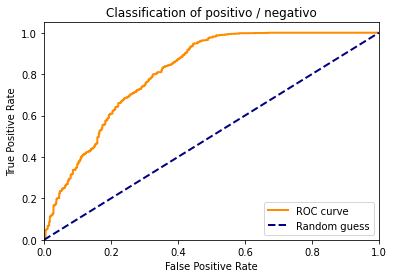

In [28]:
predict_p_1= log_reg1.predict(X_train1) 
roc_p_1= roc_curve(y_train1, predict_p_1)
plt.figure()
line_width = 2
plt.plot(roc_p_1[0], roc_p_1[1], color='darkorange', lw=line_width, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of positivo / negativo')
plt.legend(loc='lower right')
plt.show()

In [29]:
auc_p_1 = auc( roc_p_1[0], roc_p_1[1] )
print('AUC of `log_reg_1`: ', auc_p_1)

AUC of `log_reg_1`:  0.811552344607891


It was verified which variables are relevant in the sample used to train the model using the selector:

In [30]:
make_mi_scores(X_train1, y_train1)

/home/jovyan/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Codigo Sustancia                       0.189595
Color                                  0.051547
Precio promedio                        0.030695
Frecuencia                             0.021082
Edad                                   0.010721
Evento                                 0.008238
Año                                    0.006431
Desplazamiento_Si                      0.003557
Para cuantas personas es la muestra    0.000000
Primera vez Sustancia_Si               0.000000
Consumio parte de la muestra_Si        0.000000
Ciudad Evento                          0.000000
Modalidad Adquisicion                  0.000000
Name: MI Scores, dtype: float64

## Second model.

For this model the variables of interest that were used as predictors are:
* Año: Year in which the event was held.
* Codigo sustancia: The code used to differentiate each type of NPS.
* Color: It is the color of the pill or powder analyzed.
* Precio promedio: Average value paid per unit of substance or gram of substance.
* Primera vez sustancia: Whether it is the first time using the substance or not.
* Frecuencia: Indicates the frequency with which the person consumes NPS.
* Para cuántas personas es la muestra: number of people who consumed the NPS analyzed.
* Consumió parte de la muestra: whether the person consumed the substance before being analyzed or not.
* Desplazamiento: Whether the person had to move to obtain the substance.
* Edad: Age of the person who delivered the substance to be analyzed.

In [31]:
col_2= ['Año', 'Precio promedio', 'Para cuantas personas es la muestra', 'Edad', 'Primera vez Sustancia_Si',
       'Consumio parte de la muestra_Si', 'Desplazamiento_Si',
       'Codigo Sustancia', 'Color', 'Frecuencia'] # variables of interest 

In [32]:
X_train2 = X_train1[col_2]
log_reg2 = sm.Logit(y_train1, X_train2).fit()
log_reg2.summary() #second model

Optimization terminated successfully.
         Current function value: 0.340783
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2443
Model:                          Logit   Df Residuals:                     2433
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.2998
Time:                        01:45:45   Log-Likelihood:                -832.53
converged:                       True   LL-Null:                       -1189.0
Covariance Type:            nonrobust   LLR p-value:                1.095e-147
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Año                                     0.0021      0.000     10.793      0.000       0.002       0.002
Precio promedio                         0.5514      0.107      5.152      0.000       0.342       0.761
Para cuantas personas es la muestra     0.0056      0.029      0.194      0.846      -0.051       0.062
Edad                                    0.0211      0.012      1.714      0.086      -0.003       0.045
Primera vez Sustancia_Si                0.4267      0.536      0.796      0.426      -0.624       1.477
Consumio parte de la muestra_Si        -0.3348      0.143     -2.345      0.019      -0.615      -0.055
Desplazamiento_Si                      -0.1056      0.136     -0.776      0.438      -0.372       0.161
Codigo Sustancia                       -0.6401      0.036    -17.713      0.000      -0.711      -0.569
Color                                  -0.0349      0.003    -11.758      0.000      -0.041      -0.029
Frecuencia                             -0.0188      0.020     -0.956      0.339      -0.057       0.020
=======================================================================================================
"""

In this second model we did not eliminate all the variables that were not significant in the first model and we realized that even here they should also be eliminated from the model.

The ROC curve and AUC are:

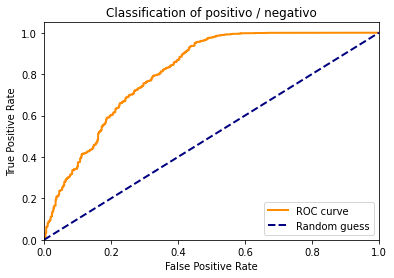

In [33]:
predict_p_2= log_reg2.predict(X_train2)
roc_p_2= roc_curve(y_train1, predict_p_2)
plt.figure()
line_width = 2
plt.plot(roc_p_2[0], roc_p_2[1], color='darkorange', lw=line_width, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of positivo / negativo')
plt.legend(loc='lower right')
plt.show()

In [34]:
auc_p_2 = auc( roc_p_2[0], roc_p_2[1] )
print('AUC of `log_reg_2`: ', auc_p_2)

AUC of `log_reg_2`:  0.811643671787512


Although variables were eliminated, the ROC curve and the AUC remained almost the same.

## Third model.

For this model the variables of interest that were used as predictors are:
* Año: Year in which the event was held.
* Codigo sustancia: The code used to differentiate each type of NPS.
* Color: It is the color of the pill or powder analyzed.
* Precio promedio: Average value paid per unit of substance or gram of substance.
* Consumió parte de la muestra: whether the person consumed the substance before being analyzed or not.

In [35]:
col_3= ['Año', 'Precio promedio','Codigo Sustancia', 'Color', 'Consumio parte de la muestra_Si'  ] #variables of interest

In [36]:
X_train3 = X_train1[col_3]
log_reg3 = sm.Logit(y_train1, X_train3).fit()
print(log_reg3.summary())

Optimization terminated successfully.
         Current function value: 0.341858
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2443
Model:                          Logit   Df Residuals:                     2438
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.2976
Time:                        01:45:45   Log-Likelihood:                -835.16
converged:                       True   LL-Null:                       -1189.0
Covariance Type:            nonrobust   LLR p-value:                7.236e-152
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Año                                 0.0023   9.19e-05     25.347  

In [37]:
predict_p_3= log_reg3.predict(X_train3)
roc_p_3= roc_curve(y_train1, predict_p_3)

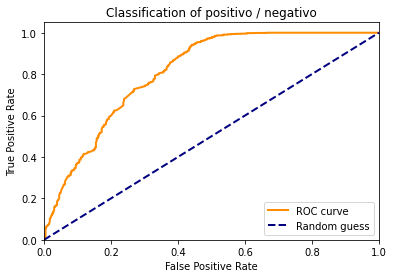

In [38]:
plt.figure()
line_width = 2
plt.plot(roc_p_3[0], roc_p_3[1], color='darkorange', lw=line_width, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of positivo / negativo')
plt.legend(loc='lower right')
plt.show()

In [39]:
auc_p_3 = auc( roc_p_3[0], roc_p_3[1] )
print('AUC of `log_reg3`: ', auc_p_3)

AUC of `log_reg3`:  0.8107744327386195


This model maintains a ROC curve and AUC as the previous ones but with much fewer variables.

From here we defined the following function for a better comparison between models:

In [40]:
def evalBinaryClassifier(model, x, y, labels=['Positives','Negatives']):
    '''
    Visualize the performance of  a Logistic Regression Binary Classifier.
    
    Displays a labelled Confusion Matrix, distributions of the predicted
    probabilities for both classes, the ROC curve, and F1 score of a fitted
    Binary Logistic Classifier. Author: gregcondit.com/articles/logr-charts
    
    Parameters
    ----------
    model : fitted scikit-learn model with predict_proba & predict methods
        and classes_ attribute. Typically LogisticRegression or 
        LogisticRegressionCV
    
    x : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples
        in the data to be tested, and n_features is the number of features
    
    y : array-like, shape (n_samples,)
        Target vector relative to x.
    
    labels: list, optional
        list of text labels for the two classes, with the positive label first
        
    Displays
    ----------
    3 Subplots
    
    Returns
    ----------
    F1: float
    '''
    #model predicts probabilities of positive class
    p = model.predict_proba(x)
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        pos_p = p[:,1]
    elif model.classes_[0] == 1:
        pos_p = p[:,0]
    
    #FIGURE
    plt.figure(figsize=[15,4])
    
    #1 -- Confusion matrix
    cm = confusion_matrix(y,model.predict(x))
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)
      
    #2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos':pos_p, 'target': y})
    plt.subplot(132)
    plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0,1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")
    
    #3 -- ROC curve with annotated decision point
    fp_rates, tp_rates, _ = roc_curve(y,p[:,1])
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(133)
    plt.plot(fp_rates, tp_rates, color='green',
             lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
    #plot current decision point:
    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()
    #Print and Return the F1 score
    tn, fp, fn, tp = [i for i in cm.ravel()]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2*(precision * recall) / (precision + recall)
    printout = (
        f'Precision: {round(precision,2)} | '
        f'Recall: {round(recall,2)} | '
        f'F1 Score: {round(F1,2)} | '
    )
    print(printout)
    return F1

We applied the function to validate the model with data that were not used for training:

/home/jovyan/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


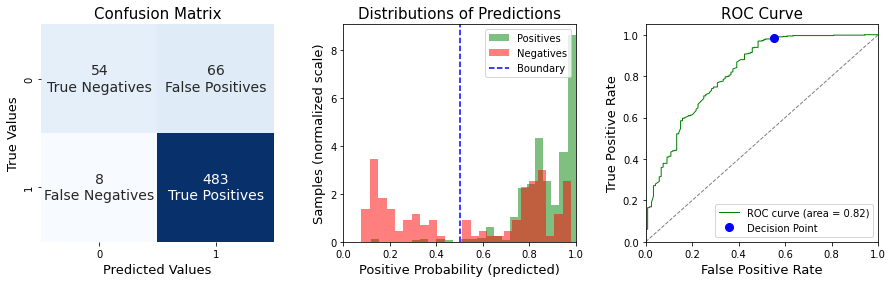

Precision: 0.88 | Recall: 0.98 | F1 Score: 0.93 | 


In [41]:
X_test3 = X_test1[col_3] 
y_test3 = y_test1.astype("int")
logr = linear_model.LogisticRegressionCV()
logr.fit(X_train3,y_train1)
F1 = evalBinaryClassifier(logr,X_test3,np.ravel(y_test3))

This model works quite well with test data.

## Fourth model.

After performing the missing values analysis, it was decided to create the model with only the following variables:
* Año: Year in which the event was held.
* Ciudad evento: City in which the event was held.
* Evento: Name of the event.
* Codigo sustancia: The code used to differentiate each type of NPS.
* Color: It is the color of the pill or powder analyzed.
* Precio promedio: Average value paid per unit of substance or gram of substance.
* Primera vez sustancia: Whether it is the first time using the substance or not.
* Modalidad adquisición: How the person acquired the NPS.
* Para cuántas personas es la muestra: number of people who consumed the NPS analyzed.
* Consumió parte de la muestra: whether the person consumed the substance before being analyzed or not.

In [42]:
col_4 =["Año","Precio promedio","Para cuantas personas es la muestra","Ciudad Evento",
        "Evento","Codigo Sustancia", "Color", "Primera vez Sustancia","Modalidad Adquisicion",
        "Consumio parte de la muestra"]

In [43]:
df_ech_cab_4 = df_ech_cab_2.copy()
df_ech_cab_4 =df_ech_cab_4[["Resultado","Año","Precio promedio","Para cuantas personas es la muestra","Ciudad Evento",
                            "Evento","Codigo Sustancia", "Color", "Primera vez Sustancia","Modalidad Adquisicion",
                            "Consumio parte de la muestra"]].dropna()


In [44]:
X4 = df_ech_cab_4.drop(["Resultado"],axis=1)
X4, cat_1, cod_1 = transform_categorical(X4) # transform categorical variables
y4 = df_ech_cab_4["Resultado"]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=40)

In [45]:
len(X_train4)

3092

This new dataframe has 649 more data than the one used in the previous models.

The same steps of the previous model were followed for this one:

In [46]:
y_train4 = y_train4.astype("int") # converting the variable to numeric 
y_train4 = y_train4.values.reshape(-1,1)
log_reg4 = sm.Logit(y_train4, X_train4).fit()  # creating the model
print(log_reg4.summary())#visualize the summary

Optimization terminated successfully.
         Current function value: 0.352517
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3092
Model:                          Logit   Df Residuals:                     3082
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.2842
Time:                        01:45:46   Log-Likelihood:                -1090.0
converged:                       True   LL-Null:                       -1522.8
Covariance Type:            nonrobust   LLR p-value:                1.544e-180
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Año                                     0.0026      0.000 

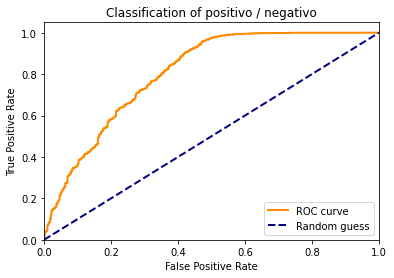

In [47]:
#ROC curve
predict_p_4= log_reg4.predict(X_train4)
roc_p_4= roc_curve(y_train4, predict_p_4)
plt.figure()
line_width = 2
plt.plot(roc_p_4[0], roc_p_4[1], color='darkorange', lw=line_width, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of positivo / negativo')
plt.legend(loc='lower right')
plt.show()

In [48]:
#AUC
auc_p_4 = auc( roc_p_4[0], roc_p_4[1] )
print('AUC of `log_reg4`: ', auc_p_4)

AUC of `log_reg4`:  0.8050729715160934


/home/jovyan/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jovyan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

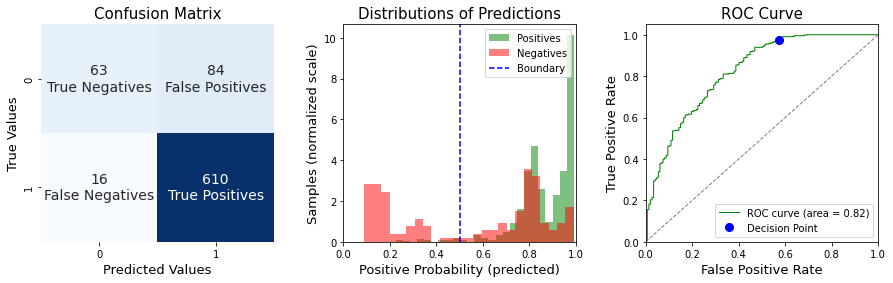

Precision: 0.88 | Recall: 0.97 | F1 Score: 0.92 | 


In [49]:
#Testing the model with the test dataframe.
y_test4 = y_test4.astype("int")
logr_2 = linear_model.LogisticRegressionCV()
logr_2.fit(X_train4,y_train4)
F1 = evalBinaryClassifier(logr_2,X_test4,np.ravel(y_test4))

Some observations on this model:
* The area under the curve is consistent with the previous model.
* Some of the variables should not be included in the model. These were eliminated in the next model.

## Fifth model.

This model includes:
* Año: Year in which the event was held.
* Codigo sustancia: The code used to differentiate each type of NPS.
* Color: It is the color of the pill or powder analyzed.
* Precio promedio: Average value paid per unit of substance or gram of substance.
* Consumió parte de la muestra: whether the person consumed the substance before being analyzed or not.

In [50]:
col_5=["Año","Precio promedio", "Codigo Sustancia", "Color", "Consumio parte de la muestra_Si"]

In [51]:
X_train5 =X_train4[col_5]
log_reg5 = sm.Logit(y_train4, X_train5).fit()  # creating the model
print(log_reg5.summary())#visualize the summary

Optimization terminated successfully.
         Current function value: 0.353885
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3092
Model:                          Logit   Df Residuals:                     3087
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.2815
Time:                        01:45:47   Log-Likelihood:                -1094.2
converged:                       True   LL-Null:                       -1522.8
Covariance Type:            nonrobust   LLR p-value:                3.114e-184
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Año                                 0.0025   9.01e-05     28.058  

/home/jovyan/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


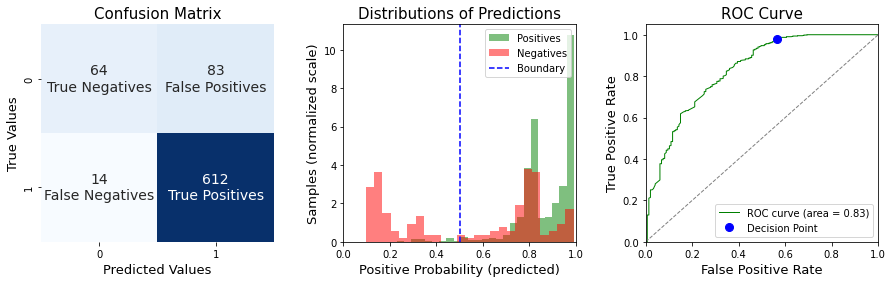

Precision: 0.88 | Recall: 0.98 | F1 Score: 0.93 | 


In [52]:
X_test5 = X_test4[col_5]
logr_3 = linear_model.LogisticRegressionCV()
logr_3.fit(X_train5,y_train4)
F1 = evalBinaryClassifier(logr_3,X_test5,np.ravel(y_test4))

In this new model we found:
* A ROC curve with better AUC than that of model 4 and similar to that of model 3.
* Although the F1 score and precision are lower than in model 3, it must be taken into account that we have a larger sample and that a new significant variable was included.
* As for the plot of distributions of predictions, although the distributions overlapped, it still predicts considerably. This may be due to the fact that the proportion of positive results is much higher than that of negative results. 

##  Sixth model

Finally we are going to extract a bigger sample of the dataset using all the non null values of the significant variables used in model 5.

In [53]:
df_ech_cab_5 = df_ech_cab_2.copy()
df_ech_cab_5 =df_ech_cab_5[["Resultado","Año","Precio promedio", "Codigo Sustancia", "Color", 
                            "Consumio parte de la muestra"]].dropna()

In [54]:
X6 = df_ech_cab_5.drop(["Resultado"],axis=1)
X6, cat_6, cod_6 = transform_categorical(X6)
y6= df_ech_cab_5["Resultado"]
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)

In [55]:
cod_6["Color"].unique()

array([68., 76.,  2., 29., 14., 24., 39.,  6., 49., 35., 36., 60., 12.,
       51., 31., 17.,  1., 13., 66., 38., 72., 21., 33., 53., 69., 22.,
       59., 41., 42., 23., 77., 74., 25., 30., 56., 63., 16., 58., 37.,
       32.,  0., 34., 19., 40., 47., 28., 55.,  5., 79.,  4., 62., 48.,
       18.,  7.,  3., 75., 27., 26., 61., 11., 44., 73., 78., 50., 46.,
       10.,  8.,  9., 45., 54., 52., 57., 43., 67., 15., 70., 65., 64.,
       71., 20.])

In [56]:
cat_6

[array(['C', 'DM', 'E', 'F', 'K', 'L', 'M', 'MZ', 'T'], dtype=object),
 array(['Aguamarina', 'Amarilla', 'Amarillo', 'Amarillo x cafe',
        'Amarillo y rojo', 'Ambar', 'Azul', 'Azul claro', 'Azul pastel',
        'Azul y amarillo', 'Azul y negro', 'Azul – rosa', 'Beige',
        'Blanca', 'Blanco', 'Cafe', 'Cafè', 'Café', 'Caramelo', 'Celeste',
        'Champagne', 'Champaña', 'Colores', 'Dorada', 'Dorado', 'Fucsia',
        'Fusca', 'Fusca – amarilla', 'Gotas', 'Gris', 'Hoffman', 'Hueso',
        'Ladrillo', 'Lila', 'Ltd', 'Marron', 'Marrón', 'Md', 'Morada',
        'Morado', 'Morado - azul', 'Morado blanco', 'Morado fucsia',
        'Morado pastel', 'Morado y amarillo', 'Morado y negro',
        'Morado y rosado', 'Morado8', 'Multi', 'Naranja', 'Naranja salido',
        'Negro', 'Negro blanco', 'Negro rojo', 'Negro rosa', 'Paisaje',
        'Palo rosa', 'Plata', 'Purpura', 'Roja', 'Rojo', 'Rojo pàlido',
        'Rojo y naranja', 'Rosa', 'Rosa claro', 'Rosa/amarillo', 'Rosada',
  

In [57]:
len(X_train6)

3112

In [58]:
y_train6 = y_train6.astype("int")
y_train6 = y_train6.values.reshape(-1,1)
log_reg6 = sm.Logit(y_train6, X_train6).fit()
print(log_reg6.summary())

Optimization terminated successfully.
         Current function value: 0.347779
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3112
Model:                          Logit   Df Residuals:                     3107
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Jul 2022   Pseudo R-squ.:                  0.2859
Time:                        01:45:48   Log-Likelihood:                -1082.3
converged:                       True   LL-Null:                       -1515.6
Covariance Type:            nonrobust   LLR p-value:                2.791e-186
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Año                                 0.0026   9.15e-05     28.138  

/home/jovyan/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


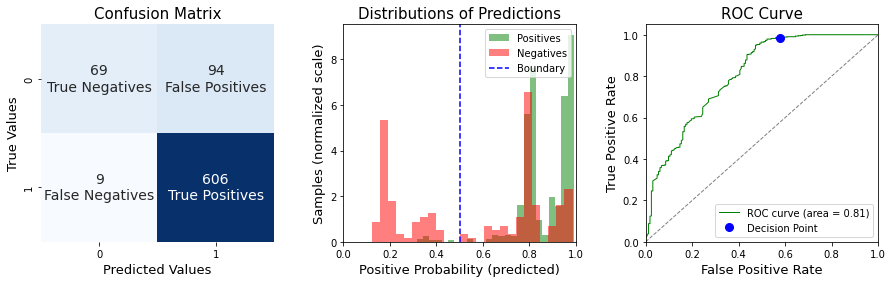

Precision: 0.87 | Recall: 0.99 | F1 Score: 0.92 | 


In [59]:
y_test6 = y_test6.astype("int")
logr_6 = linear_model.LogisticRegressionCV()
logr_6.fit(X_train6,y_train6)
F1 = evalBinaryClassifier(logr_6,X_test6,np.ravel(y_test6))

In the following table There is the summary of all the models executed in this notebook:

|Model number|Independent variables|sample size|AUC|
| :-: | :-: | :-: | :-: |
|1|13|2443|0.81|
|2|10|2443|0.81|
|3|5|2443|0.82|
|4|10|3092|0.82|
|5|5|3092|0.83|
|6|5|3112|0.81|
